In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_sal,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_sal', 'max_sal', 'avg_sal',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp'],
      dtype='object')

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [12]:
## fix Los Angeles
df.job_state.value_counts()

CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
NC              21
WA              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
IN              10
UT              10
WI              10
MO               9
AZ               9
AL               8
GA               6
MI               6
DE               6
KY               6
IA               5
CT               5
NE               4
OR               4
LA               4
NM               3
KS               3
ID               2
MN               2
SC               1
Los Angeles      1
RI               1
Name: job_state, dtype: int64

In [9]:
df['job_state'] = df['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
AZ      9
MO      9
AL      8
DE      6
GA      6
MI      6
KY      6
IA      5
CT      5
OR      4
LA      4
NE      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [10]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [14]:
# hourly to annual (hourly*2000=annual >> hourly*2K >> hourly*2)
df['min_sal'] = df.apply(lambda x : x.min_sal*2 if x.hourly == 1 else x.min_sal, axis=1)
df['max_sal'] = df.apply(lambda x : x.max_sal*2 if x.hourly == 1 else x.max_sal, axis=1)

In [17]:
df[df['hourly']==1][['hourly', 'min_sal', 'max_sal']]

,hourly,min_sal,max_sal
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [18]:
df.company_txt

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [21]:
# parse the company text
df['company_txt'] = df['company_txt'].apply(lambda x : x.replace('\n',''))
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [22]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_sal,max_sal,avg_sal,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_sal', 'max_sal', 'avg_sal',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

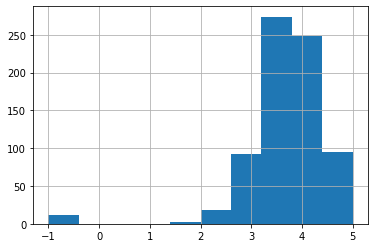

In [24]:
df.Rating.hist()

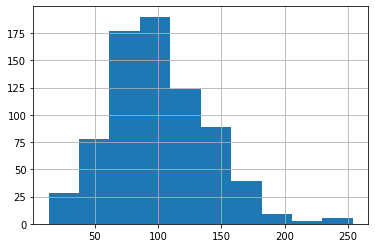

In [25]:
df.avg_sal.hist()

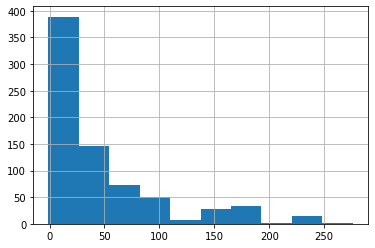

In [28]:
df.age.hist()
#exponential dist>> needs to be normalized if used (with regression)

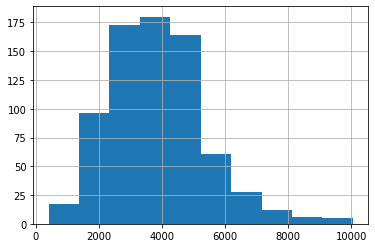

In [29]:
df.desc_len.hist()

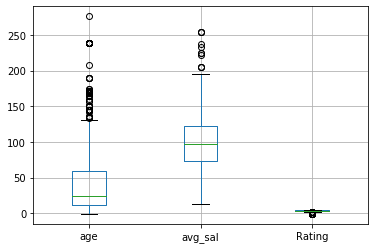

In [32]:
df.boxplot(column = ['age','avg_sal', 'Rating'])

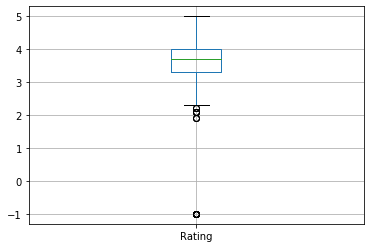

In [33]:
df.boxplot(column = 'Rating')

In [37]:
# continuous then categorical then pivot tables
df[['age','avg_sal', 'Rating', 'desc_len']].corr()
# rating: very small negative corr w/ desc_len
# older comps have larger job desc

,age,avg_sal,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_sal,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


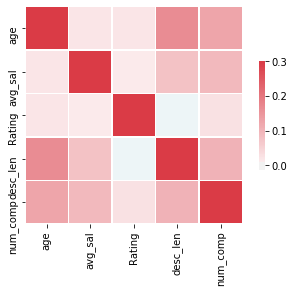

In [45]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_sal', 'Rating', 'desc_len', 'num_comp']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# strongest corr (age, desc_len) & (sal, desc_len) & (age, competitors)

In [44]:
# catagorical variables
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_sal', 'max_sal', 'avg_sal',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [46]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

bar chart for Location: Total: 200


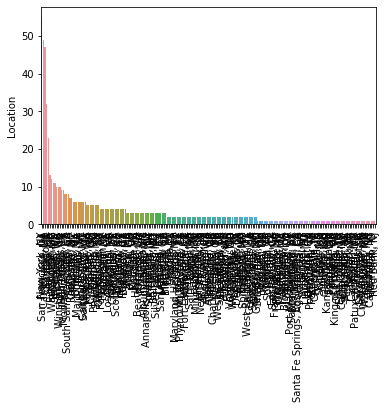

bar chart for Headquarters: Total: 198


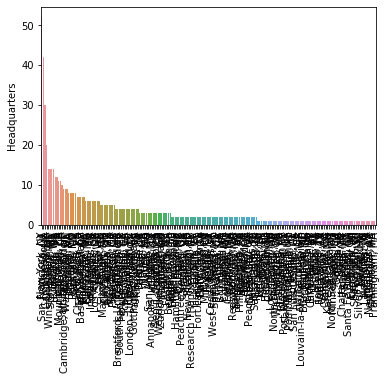

bar chart for Size: Total: 9


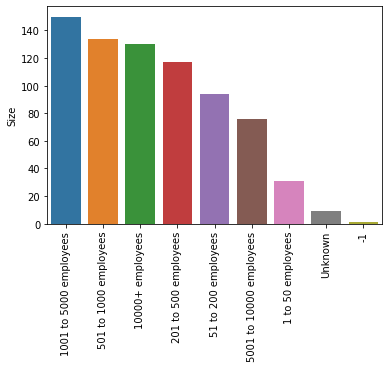

bar chart for Type of ownership: Total: 11


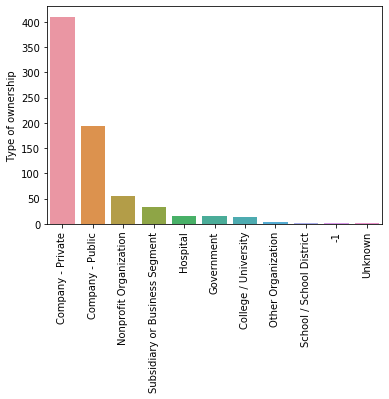

bar chart for Industry: Total: 60


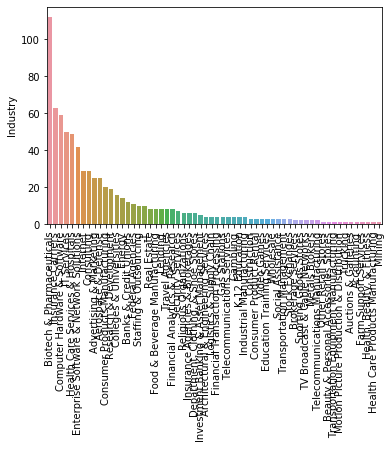

bar chart for Sector: Total: 25


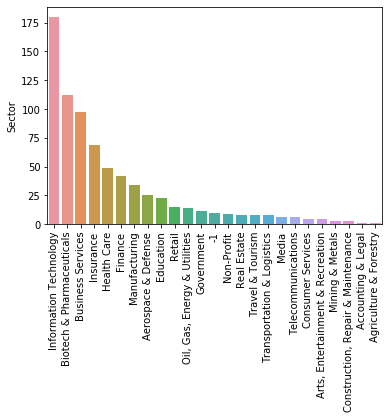

bar chart for Revenue: Total: 14


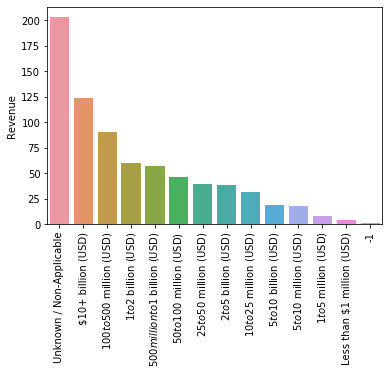

bar chart for company_txt: Total: 343


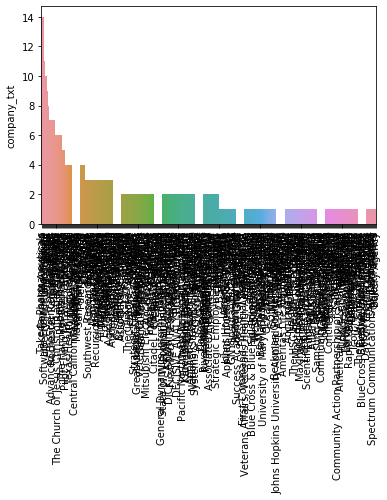

bar chart for job_state: Total: 37


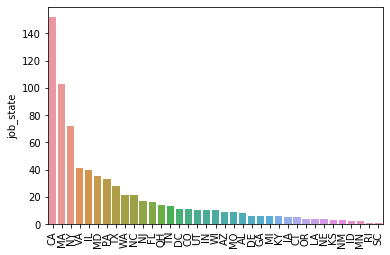

bar chart for same_state: Total: 2


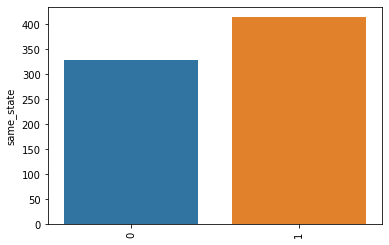

bar chart for python_yn: Total: 2


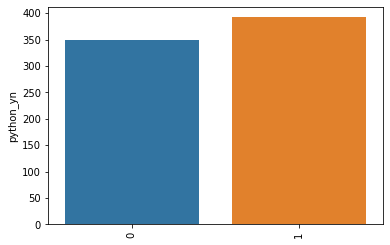

bar chart for R_yn: Total: 2


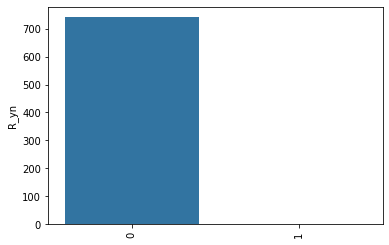

bar chart for spark: Total: 2


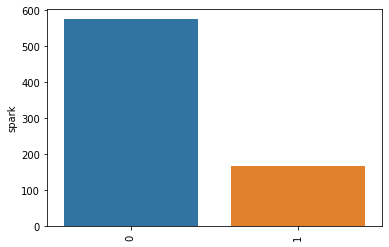

bar chart for aws: Total: 2


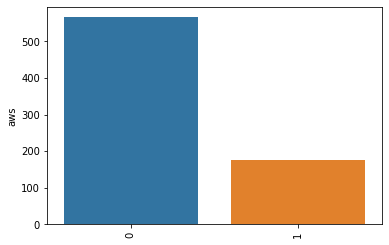

bar chart for excel: Total: 2


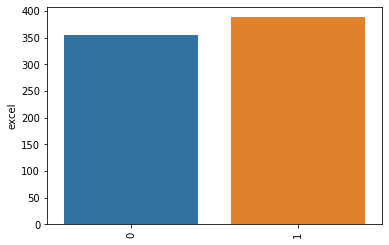

bar chart for job_simp: Total: 7


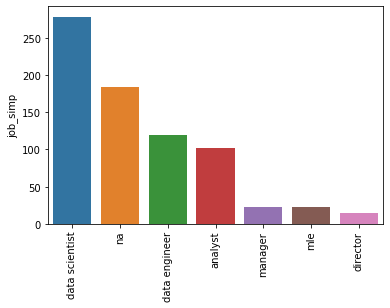

bar chart for seniority: Total: 3


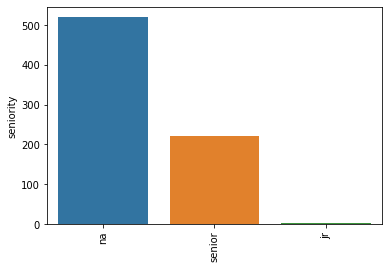

In [63]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('bar chart for %s: Total: %d' % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    

bar chart for Location: Total: 20


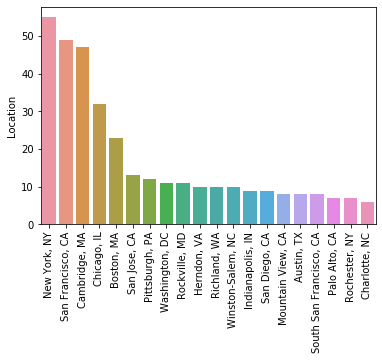

bar chart for Headquarters: Total: 20


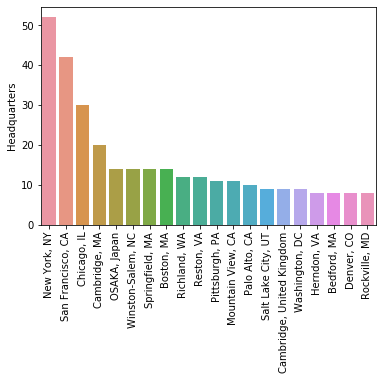

bar chart for company_txt: Total: 20


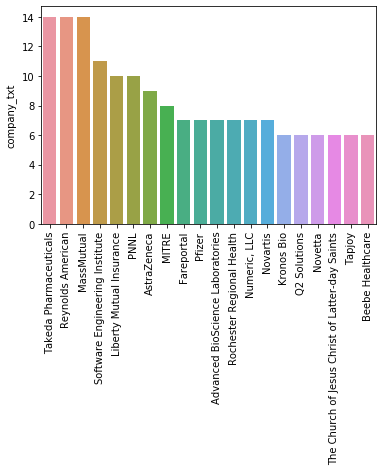

In [72]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('bar chart for %s: Total: %d' % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [73]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_sal', 'max_sal', 'avg_sal',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [85]:
pd.pivot_table(df, index=['job_simp'], values=['avg_sal']).sort_values(by='avg_sal', ascending=False)

,avg_sal
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843


In [87]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values=['avg_sal'])

avg_sal
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [95]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_simp'], values=['avg_sal'], aggfunc='count').sort_values(by='job_state', ascending=False)

avg_sal
job_state job_simp               
WI        na                    4
          data scientist        3
          analyst               3
WA        na                    1
          data scientist       17
          analyst               3
VA        na                    5
          mle                   2
          data scientist       18
          data engineer        10
          analyst               6
UT        data engineer         3
          analyst               4
          data scientist        3
TX        na                    7
          data scientist       13
          data engineer         8
TN        data scientist        1
          data engineer        10
          analyst               2
SC        na                    1
RI        analyst               1
PA        manager               3
          data engineer         1
          data scientist        6
          analyst               8
          mle                   7
          na                    8
OR        data scientist        3
          data engineer         1
OH        na                    3
          data scientist        7
          analyst               4
NY        na                   12
          mle                   2
          data scientist       40
          data engineer         4
          analyst              14
NM        data scientist        3
NJ        data scientist        4
          analyst               6
          data engineer         2
          manager               2
          director              2
          na                    1
NE        na                    4
NC        na                   12
          data scientist        3
          data engineer         6
MO        na                    3
          manager               1
          data scientist        3
          analyst               2
MN        data engineer         1
          analyst               1
MI        manager               2
          data scientist        4
MD        na                   16
          data scientist       13
          data engineer         3
          analyst               3
MA        na                   46
          manager               5
          director              6
          data scientist       30
          data engineer        12
          analyst               4
LA        analyst               1
          data engineer         2
          na                    1
KY        na                    4
          data scientist        2
KS        mle                   3
IN        na                    4
          data scientist        2
          data engineer         4
IL        analyst               3
          na                    6
          mle                   2
          director              6
          data scientist       15
          data engineer         8
ID        analyst               2
IA        analyst               2
          data engineer         3
GA        data scientist        3
          na                    3
FL        data scientist        7
          data engineer         3
          analyst               6
DE        na                    6
DC        data scientist        5
          data engineer         4
          analyst               2
CT        na                    3
          data scientist        2
CO        mle                   1
          data engineer         3
          analyst               1
          na                    3
          data scientist        3
CA        na                   27
          mle                   5
          manager               9
          data scientist       68
          data engineer        25
          analyst              18
AZ        data scientist        1
          data engineer         5
          analyst               1
          na                    2
AL        na                    2
          data engineer         1
          analyst               5

In [98]:
pd.pivot_table(df[df['job_simp']=='data scientist'], index=['job_state'], values=['avg_sal']).sort_values(by='avg_sal', ascending=False)
# show only data scientists

,avg_sal
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [99]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_sal', 'max_sal', 'avg_sal',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [100]:
# salary x rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [107]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_sal']]

In [118]:
for i in df_pivots.columns[:-1]:
    print (i) 
    print(pd.pivot_table(df_pivots, index = i, values=['avg_sal']).sort_values('avg_sal', ascending = False))

Rating
           avg_sal
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                             avg_sal
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [120]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_sal', aggfunc = 'count')
# to explore the number of companies (aggfunc = 'count') looking for python

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [122]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

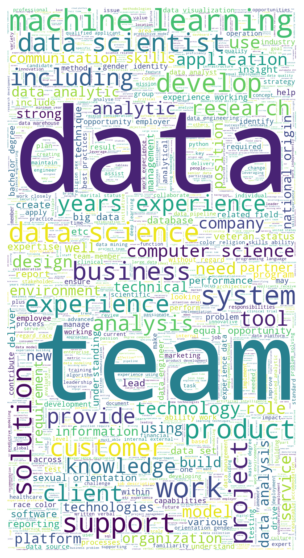

In [126]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()